In [85]:
import pandas as pd
import numpy as np
import time
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_pickle('News_train_df.pkl')
X_train.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,65.73,7.6,9.10,8.5,9.41,166,7.375000,8.91,1140,786,...,0.000000,0.000000,0.054647,0.000000,0.000000,0.053810,0.0,0.036393,0.061541,0.0
1,48.27,14.3,12.37,18.6,9.88,113,21.666667,15.97,869,561,...,0.067625,0.072737,0.113305,0.000000,0.068093,0.055785,0.0,0.000000,0.000000,0.0
2,56.59,11.1,10.80,13.3,8.72,128,20.333333,12.62,1111,737,...,0.000000,0.000000,0.000000,0.064856,0.000000,0.000000,0.0,0.029929,0.202445,0.0
3,78.79,6.7,5.80,7.2,6.68,103,7.666667,8.35,1445,1141,...,0.000000,0.036497,0.028426,0.000000,0.000000,0.000000,0.0,0.132515,0.000000,0.0
4,47.22,12.6,12.89,15.5,9.10,163,16.250000,13.33,1304,838,...,0.049497,0.000000,0.041466,0.000000,0.000000,0.040831,0.0,0.027615,0.000000,0.0


In [3]:
X_train.drop('clean_text', inplace = True, axis = 1)
X_train.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,65.73,7.6,9.10,8.5,9.41,166,7.375000,8.91,1140,786,...,0.000000,0.000000,0.054647,0.000000,0.000000,0.053810,0.0,0.036393,0.061541,0.0
1,48.27,14.3,12.37,18.6,9.88,113,21.666667,15.97,869,561,...,0.067625,0.072737,0.113305,0.000000,0.068093,0.055785,0.0,0.000000,0.000000,0.0
2,56.59,11.1,10.80,13.3,8.72,128,20.333333,12.62,1111,737,...,0.000000,0.000000,0.000000,0.064856,0.000000,0.000000,0.0,0.029929,0.202445,0.0
3,78.79,6.7,5.80,7.2,6.68,103,7.666667,8.35,1445,1141,...,0.000000,0.036497,0.028426,0.000000,0.000000,0.000000,0.0,0.132515,0.000000,0.0
4,47.22,12.6,12.89,15.5,9.10,163,16.250000,13.33,1304,838,...,0.049497,0.000000,0.041466,0.000000,0.000000,0.040831,0.0,0.027615,0.000000,0.0


In [4]:
X_test = pd.read_pickle('News_test_df.pkl')
X_test.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,69.11,8.3,9.28,10.5,8.55,89,8.166667,10.38,759,533,...,0.000000,0.0,0.037984,0.0,0.00000,0.000000,0.000000,0.050592,0.0,0.000000
1,63.73,10.4,10.33,13.6,8.61,213,13.750000,12.83,1908,1338,...,0.064104,0.0,0.000000,0.0,0.00000,0.343723,0.000000,0.000000,0.0,0.000000
2,55.44,9.5,14.38,13.3,12.44,18,11.250000,12.67,103,63,...,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
3,57.71,10.7,10.56,13.0,8.98,287,14.000000,11.81,2252,1508,...,0.000000,0.0,0.094228,0.0,0.00000,0.139177,0.060806,0.219631,0.0,0.133949
4,41.33,14.9,13.47,18.5,9.98,204,36.000000,16.68,1469,892,...,0.000000,0.0,0.000000,0.0,0.03899,0.000000,0.041867,0.000000,0.0,0.000000


In [5]:
X_test.drop('clean_text', inplace = True, axis = 1)
X_test.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,69.11,8.3,9.28,10.5,8.55,89,8.166667,10.38,759,533,...,0.000000,0.0,0.037984,0.0,0.00000,0.000000,0.000000,0.050592,0.0,0.000000
1,63.73,10.4,10.33,13.6,8.61,213,13.750000,12.83,1908,1338,...,0.064104,0.0,0.000000,0.0,0.00000,0.343723,0.000000,0.000000,0.0,0.000000
2,55.44,9.5,14.38,13.3,12.44,18,11.250000,12.67,103,63,...,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
3,57.71,10.7,10.56,13.0,8.98,287,14.000000,11.81,2252,1508,...,0.000000,0.0,0.094228,0.0,0.00000,0.139177,0.060806,0.219631,0.0,0.133949
4,41.33,14.9,13.47,18.5,9.98,204,36.000000,16.68,1469,892,...,0.000000,0.0,0.000000,0.0,0.03899,0.000000,0.041867,0.000000,0.0,0.000000


In [6]:
y_train = pd.read_pickle('y_train.pkl')
y_train.head()

0    1
1    1
2    1
3    0
4    1
Name: real, dtype: int64

In [35]:
y_test = pd.read_pickle('y_test.pkl')
y_test.head()

0    1
1    1
2    1
3    1
4    0
Name: real, dtype: int64

In [8]:
'''I will start with a basic logistic regression, a classic for binary classification tasks'''

'I will start with a basic logistic regression as a baseline for my other models'

In [9]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,0.942761,-1.282372,-1.252542,-1.546857,-0.082368,0.901283,-1.397755,-1.335807,0.499583,0.556509,...,-0.291893,-0.253529,1.034505,-0.186961,-0.287631,0.783464,-0.254653,0.024086,1.222872,-0.203004
1,-0.646595,1.355058,0.486172,1.680740,0.351347,0.256698,1.479458,1.414851,0.159529,0.136614,...,1.829911,2.168789,2.548196,-0.186961,1.968665,0.826040,-0.254653,-0.667435,-0.307607,-0.203004
2,0.110762,0.095390,-0.348623,-0.012950,-0.719098,0.439128,1.211030,0.109652,0.463193,0.465065,...,-0.291893,-0.253529,-0.375700,1.394514,-0.287631,-0.376894,-0.254653,-0.098733,4.727008,-0.203004
3,2.131592,-1.636654,-3.007208,-1.962290,-2.601605,0.135078,-1.339036,-1.553990,0.882299,1.219010,...,-0.291893,0.961914,0.357859,-0.186961,-0.287631,-0.376894,-0.254653,1.850568,-0.307607,-0.203004
4,-0.742175,0.685859,0.762665,0.690091,-0.368435,0.864797,0.388969,0.386276,0.705371,0.653551,...,1.261139,-0.253529,0.694357,-0.186961,-0.287631,0.503581,-0.254653,-0.142712,-0.307607,-0.203004


In [23]:
start_time = time.time()
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.674634695053101 seconds ---


In [24]:
print("score on test: " + str(lr.score(X_test_scaled, y_test)))
print("score on train: "+ str(lr.score(X_train_scaled, y_train)))

score on test: 0.9226674409601239
score on train: 0.9290853363445717


In [41]:
y_pred_test_lr = lr.predict(X_test_scaled)
y_pred_train_lr = lr.predict(X_train_scaled)


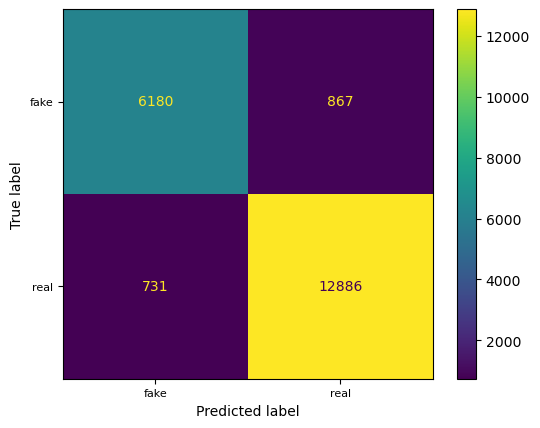

In [39]:
cm = confusion_matrix(y_test, y_pred_test, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['fake', 'real'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['fake', 'real'], fontsize = 8)
ax.set_yticklabels(labels = ['fake', 'real'], fontsize = 8)
display_cm.plot(ax = ax)

In [42]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7047
           1       0.94      0.95      0.94     13617

    accuracy                           0.92     20664
   macro avg       0.92      0.91      0.91     20664
weighted avg       0.92      0.92      0.92     20664



In [45]:
print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     21139
           1       0.94      0.95      0.95     40851

    accuracy                           0.93     61990
   macro avg       0.92      0.92      0.92     61990
weighted avg       0.93      0.93      0.93     61990



In [ ]:
"Code adapted from https://forecastegy.com/posts/feature-importance-in-logistic-regression/#feature-importance-in-binary-logistic-regression"

In [48]:
coefficients = lr.coef_[0]

In [53]:
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head(50)

,Feature,Importance
1,fk_score,4.273865
3,ari_score,2.718142
12,letter_count,2.624555
0,fe_score,2.557415
5,dw_score,2.072366
387,TFIDF_reuters,1.464183
2,cl_score,1.443879
9,word_count,1.189155
13,polysyllab_count,1.070728
14,monosyllab_count,1.027846


In [43]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

In [15]:
clf = GridSearchCV(lr,                  
                   param_grid = parameters,   
                   scoring='accuracy',       
                   cv=3) 

In [16]:
start_time = time.time()
clf.fit(X_train_scaled,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 22506.37242126465 seconds ---


In [54]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9271011583193545


In [55]:
clf_lr = LogisticRegression(C = 1000, 
                            penalty = 'l2', 
                            solver = 'newton-cg')

In [56]:
clf_lr.fit(X_train_scaled,y_train)
y_pred_clf_lr = logreg.predict(X_test_scaled)
print("Accuracy:",logreg.score(X_test_scaled, y_test))

Accuracy: 0.924506387921022


In [65]:
y_pred_test_clr_lr = clf_lr.predict(X_test_scaled)
y_pred_train_clr_lr = clf_lr.predict(X_train_scaled)

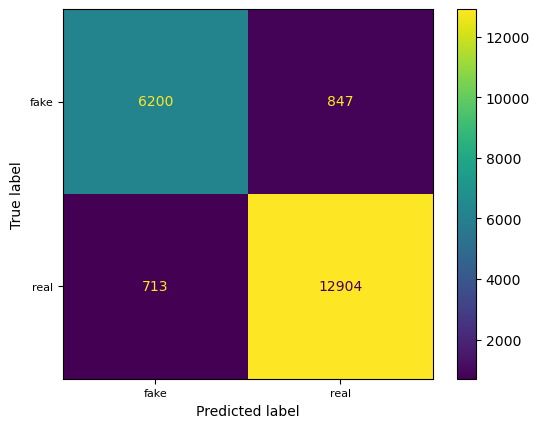

In [62]:
cm = confusion_matrix(y_test, y_pred_test, labels = clf_lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['fake', 'real'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['fake', 'real'], fontsize = 8)
ax.set_yticklabels(labels = ['fake', 'real'], fontsize = 8)
display_cm.plot(ax = ax)

In [60]:
coefficients = logreg.coef_[0]

In [69]:
feature_importance = pd.DataFrame({'Feature': X_test_scaled.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head(50)

,Feature,Importance
12,letter_count,58.143093
11,char_count,46.672348
9,word_count,45.168407
8,syllable_count,22.765878
14,monosyllab_count,14.649621
5,dw_score,2.231395
13,polysyllab_count,2.136388
1,fk_score,1.952707
387,TFIDF_reuters,1.474621
3,ari_score,1.181026


In [66]:
print(classification_report(y_test, y_pred_test_clr_lr))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7047
           1       0.94      0.95      0.94     13617

    accuracy                           0.92     20664
   macro avg       0.92      0.91      0.92     20664
weighted avg       0.92      0.92      0.92     20664



In [67]:
print(classification_report(y_train, y_pred_train_clr_lr))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     21139
           1       0.94      0.95      0.95     40851

    accuracy                           0.93     61990
   macro avg       0.93      0.92      0.92     61990
weighted avg       0.93      0.93      0.93     61990



In [88]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("score on test: " + str(gnb.score(X_test, y_test)))
print("score on train: "+ str(gnb.score(X_train, y_train)))

score on test: 0.8058943089430894
score on train: 0.8110824326504275
